# БДЗ

In [19]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from typing import Dict, Tuple, List

## Данные

In [592]:
df = pd.read_excel('data_matstat_K5.xls', sheet_name='C - plasma')

## 1. Описательные статистики
### 1.1 Выборочные характеристики

In [7]:
df.shape

(315, 14)

In [9]:
df['C9'].mean(), df['C10'].mean(), df['C11'].mean()

(3.2793650793650793, 242.4606349206349, 2185.6031746031745)

In [10]:
df['C9'].var(), df['C10'].var(), df['C11'].var()

(151.8533626529168, 17421.786152461835, 2172341.552219189)

In [11]:
df['C9'].std(), df['C10'].std(), df['C11'].std()

(12.322879641257428, 131.9916139474847, 1473.8865465900653)

In [12]:
st.skew(df['C9']), st.skew(df['C10']), st.skew(df['C11'])

(13.757134658078, 1.4729974670843415, 1.6060431535588293)

In [14]:
st.kurtosis(df['C9']), st.kurtosis(df['C10']), st.kurtosis(df['C11'])

(217.81506388614636, 3.3396698849351623, 3.3991654155658946)

## 1.2 Группировка и гистограммы частот

In [75]:
k = math.ceil(1 + math.log2(len(df)))
k, (df['C9'].max() - df['C9'].min()) / k

(10, 20.3)

In [87]:
pd.cut(df['C9'], bins=k).value_counts(sort=False).values

array([310,   4,   0,   0,   0,   0,   0,   0,   0,   1])

In [91]:
pd.cut(df['C9'], bins=k).value_counts(sort=False, normalize=True)

(-0.203, 20.3]    0.984127
(20.3, 40.6]      0.012698
(40.6, 60.9]      0.000000
(60.9, 81.2]      0.000000
(81.2, 101.5]     0.000000
(101.5, 121.8]    0.000000
(121.8, 142.1]    0.000000
(142.1, 162.4]    0.000000
(162.4, 182.7]    0.000000
(182.7, 203.0]    0.003175
Name: C9, dtype: float64

In [90]:
pd.cut(df['C9'], bins=k).value_counts(sort=False).cumsum()

(-0.203, 20.3]    310
(20.3, 40.6]      314
(40.6, 60.9]      314
(60.9, 81.2]      314
(81.2, 101.5]     314
(101.5, 121.8]    314
(121.8, 142.1]    314
(142.1, 162.4]    314
(162.4, 182.7]    314
(182.7, 203.0]    315
Name: C9, dtype: int64

In [94]:
pd.cut(df['C9'], bins=k).value_counts(sort=False, normalize=True).cumsum()

(-0.203, 20.3]    0.984127
(20.3, 40.6]      0.996825
(40.6, 60.9]      0.996825
(60.9, 81.2]      0.996825
(81.2, 101.5]     0.996825
(101.5, 121.8]    0.996825
(121.8, 142.1]    0.996825
(142.1, 162.4]    0.996825
(162.4, 182.7]    0.996825
(182.7, 203.0]    1.000000
Name: C9, dtype: float64

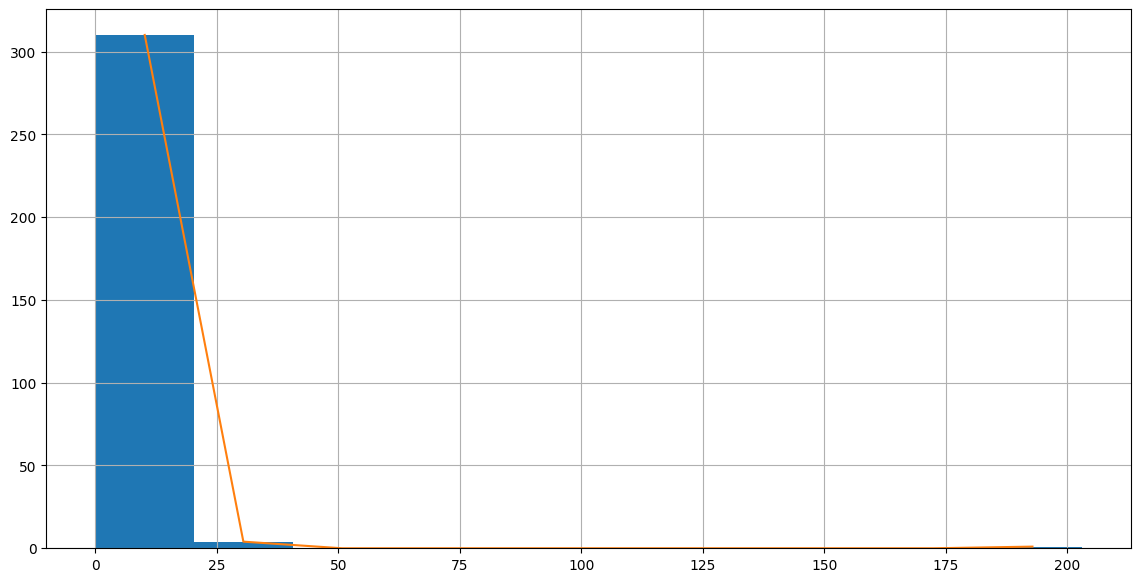

In [68]:
plt.figure(figsize=(14,7))

count, division = np.histogram(df['C9'], bins=k)
ar = []
for i in range(len(division)-1):
  ar.append(((division[i + 1] - division[i]) / 2) + division[i])

df['C9'].hist(bins=k, density=False)
plt.plot(ar, count)

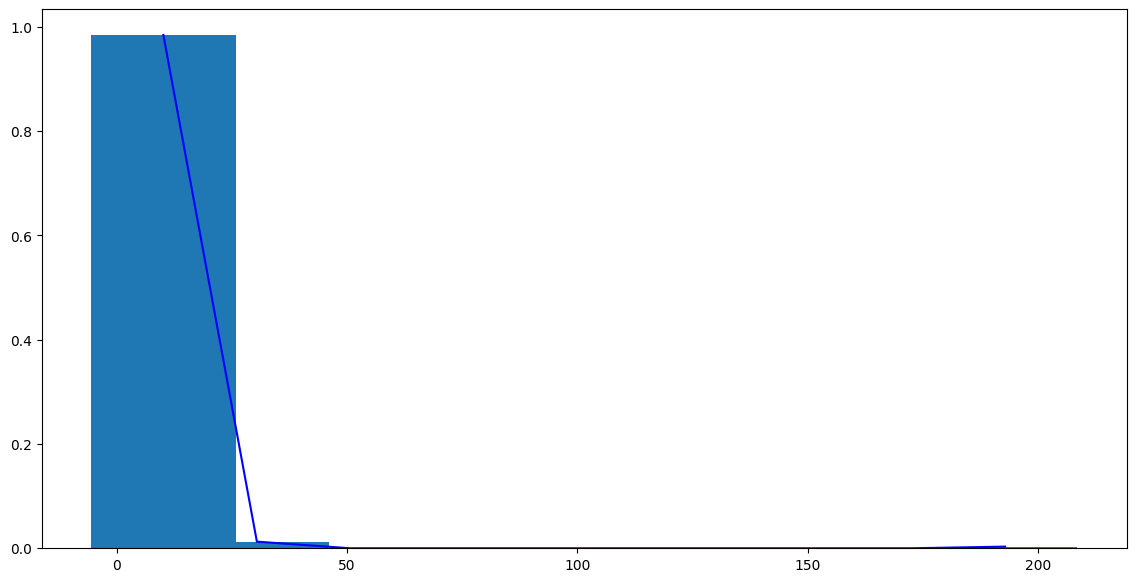

In [69]:
plt.figure(figsize=(14,7))
y = pd.cut(df['C9'], bins=k).value_counts(sort=False, normalize=True).values
plt.bar(ar, y, width = 31.4)
plt.plot(ar, y, color="blue")

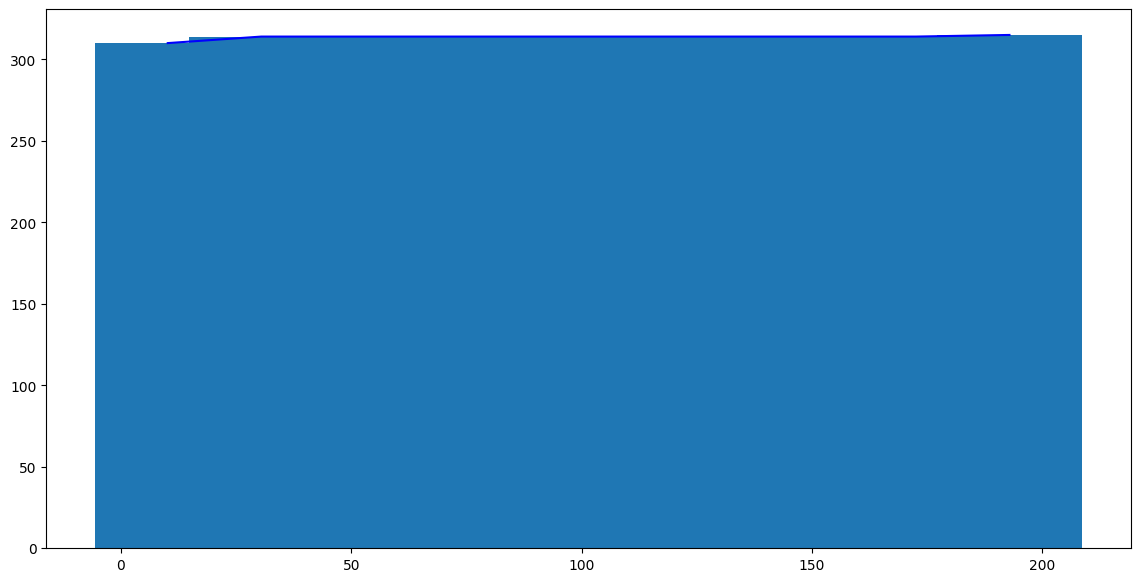

In [70]:
plt.figure(figsize=(14,7))
y1 = pd.cut(df['C9'], bins=k).value_counts(sort=False).cumsum()
plt.bar(ar, y1, width = 31.4)
plt.plot(ar, y1, color="blue")

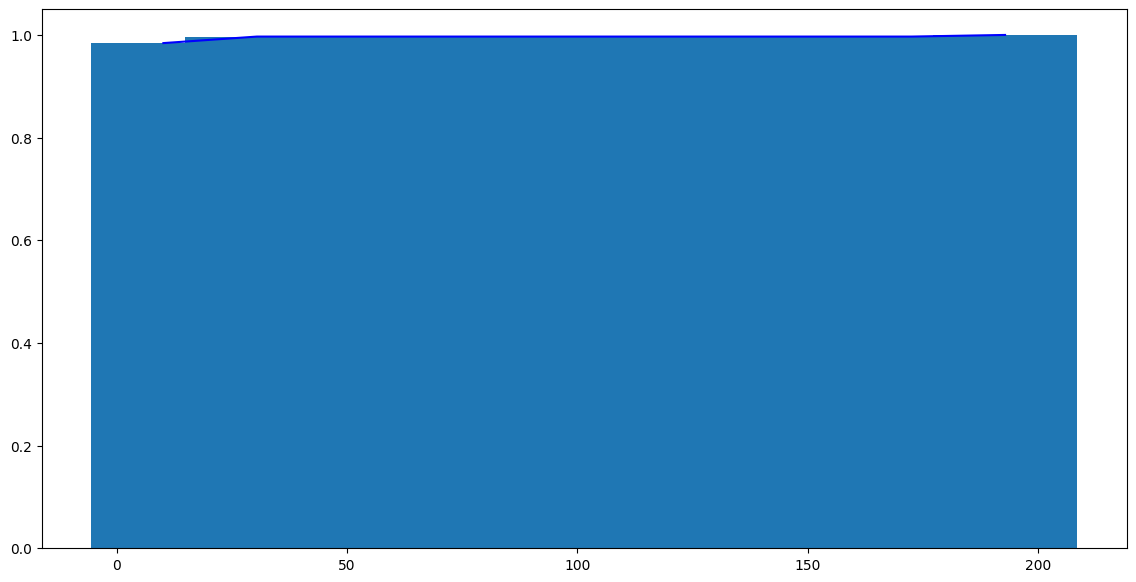

In [72]:
plt.figure(figsize=(14,7))
y2 = pd.cut(df['C9'], bins=k).value_counts(sort=False, normalize = True).values.cumsum()
plt.bar(ar, y2, width = 31.4)
plt.plot(ar, y2, color="blue")

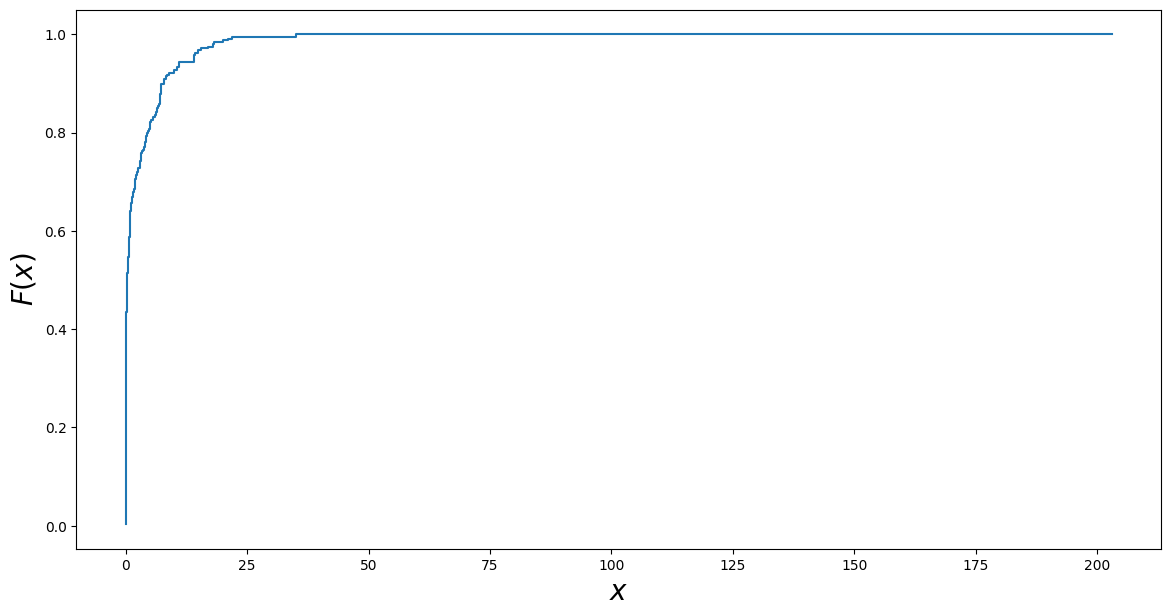

In [77]:
plt.figure(figsize=(14,7))

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(df['C9'])

plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

## 2. Интервальные оценки

### 2.1 Доверительный интервал матож

In [97]:
# В качестве центральной статистики выберем стандартизованное среднее

def get_interval_mu(quantile, n, m, s):
  t_rv = st.t(n-1)

  a = m - (s * t_rv.ppf(1 - quantile / 2)) / n**(1/2)
  b = m + (s * t_rv.ppf(1 - quantile / 2)) / n**(1/2)

  return a, b

In [101]:
m = df['C9'].mean()
s = df['C9'].std()

get_interval_mu(0.01, len(df), m, s), get_interval_mu(0.05, len(df), m, s), get_interval_mu(0.1, len(df), m, s)

((1.4799926443441702, 5.078737514385988),
 (1.913265997942944, 4.645464160787214),
 (2.133938153235494, 4.424792005494664))

### 2.2 Доверительные интервалы для дисперсии

In [102]:
# Доверительный интервал для дисперсии σ2 при неизвестном математическом ожидании m.

def get_interval_var(quantile, n, s):
  f_rv = st.chi2(n-1)

  a = ((n-1) * (s**2)) / f_rv.ppf(1 - quantile / 2)
  b = ((n-1) * (s**2)) / f_rv.ppf(quantile / 2)

  return a, b

In [103]:
get_interval_var(0.01, len(df), s), get_interval_var(0.05, len(df), s), get_interval_var(0.1, len(df), s)

((124.7238982161733, 188.3114132158274),
 (130.64173052675784, 178.71510008215242),
 (133.81582295524535, 174.0547513098481))

### 2.3 Доверительный интервал для разности мат. ожиданий

In [118]:
## Доверительный интервал для разности математических ожиданий m1 – m2 при неизвестных равных дисперсиях

def get_interval_mean_diff(m1, m2, s1, s2, n1, n2, quantile):
  s = (((n1 - 1)*(s1**2) + (n2 - 1)*(s2**2))/(n1 + n2 - 2))**(1/2)
  t_rv = st.t(n1 + n2 - 2)

  a = (m1 - m2) - t_rv.ppf(1 - quantile / 2) * s * (((1/n1) + (1/n2))**(1/2))
  b = (m1 - m2) + t_rv.ppf(1 - quantile / 2) * s * (((1/n1) + (1/n2))**(1/2))

  return a, b

In [110]:
get_interval_mean_diff(df['C11'].mean(), df['C12'].mean(), df['C11'].std(), df['C12'].std(), len(df), len(df), 0.01), \
get_interval_mean_diff(df['C11'].mean(), df['C12'].mean(), df['C11'].std(), df['C12'].std(), len(df), len(df), 0.05), \
get_interval_mean_diff(df['C11'].mean(), df['C12'].mean(), df['C11'].std(), df['C12'].std(), len(df), len(df), 0.1)

((1121.8156646706677, 1583.9621131071096),
 (1177.2597016430059, 1528.5180761347715),
 (1205.56296603485, 1500.2148117429274))

In [119]:
# Доверительный интервал для отношения дисперсий  при неизвестных математических ожиданиях m1 и m2.

def get_interval_var_rel(quantile, s1, s2, n1, n2):
  fh_rv = st.f(n2-1,n1-1)

  a = ((s1**2) * fh_rv.ppf(quantile / 2))/ (s2**2)
  b = ((s1**2) * fh_rv.ppf(1 - quantile / 2))/ (s2**2)

  return a, b

In [116]:
get_interval_var_rel(0.01, df['C11'].std(), df['C12'].std(), len(df), len(df)), \
get_interval_var_rel(0.05, df['C11'].std(), df['C12'].std(), len(df), len(df)), \
get_interval_var_rel(0.1, df['C11'].std(), df['C12'].std(), len(df), len(df))

((4.673990312398299, 8.372496671389161),
 (5.012156001879106, 7.807611797794924),
 (5.194250362736095, 7.53390106364578))

## 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

In [129]:
n = len(df)

### 3.1. Проверка статистических гипотез о математических ожиданиях

In [120]:
df['C9'].mean()

3.2793650793650793

In [121]:
# Гипотеза о значении математического ожидания при неизвестной дисперсии

check_means = [3.0, 4.0, 20.0]

for check_mean in check_means:
  print("T-test : The z-statistic is %.3f and the p-value is %.3f." % st.ttest_1samp(df['C9'], check_mean))

T-test : The z-statistic is 0.402 and the p-value is 0.688.
T-test : The z-statistic is -1.038 and the p-value is 0.300.
T-test : The z-statistic is -24.082 and the p-value is 0.000.


## 3.2. Проверка статистических гипотез о дисперсиях

In [134]:
df['C9'].std()

12.322879641257428

In [149]:
check_vars = [12.1, 0.25, 4000]

In [150]:
for sigma0 in check_vars:
    z = df['C9'].var() * (n-1) / sigma0**(2)
    p_value = 2*min([st.chi2.cdf(z, n - 1), 1 - st.chi2.cdf(z, n - 1)])
    print(" chi2-test : The z-statistic is %.3f and the p-value is %.3f." % (z,  p_value))

 chi2-test : The z-statistic is 325.674 and the p-value is 0.626.
 chi2-test : The z-statistic is 762911.294 and the p-value is 0.000.
 chi2-test : The z-statistic is 0.003 and the p-value is 0.000.


## 3.3 Проверка статистических гипотез о равенстве математических ожиданий

In [153]:
df['C11'].mean(), df['C12'].mean()

(2185.6031746031745, 832.7142857142857)

In [152]:
st.ttest_ind(df['C11'], df['C12'])

TtestResult(statistic=15.126948860992421, pvalue=2.623470248258301e-44, df=628.0)

## 3.4. Проверка статистических гипотез о равенстве дисперсий

In [155]:
df['C11'].var(),  df['C12'].var()

(2172341.552219189, 347261.5614194723)

In [154]:
z = df['C11'].var() / df['C12'].var()
z, 2*min([st.f.cdf(z, n -1 , n-1), 1 - st.f.cdf(z, n-1, n-1)])

(6.255634926421135, 2.220446049250313e-16)

## 4. Критерии согласия

### 4.1. Критерий хи-квадрат

In [156]:
sample = df['C9']

In [238]:
q3, q1 = np.percentile (df['C9'], [75 ,25])
iqr = q3 - q1
k = int(np.ceil(2 * iqr * df['C9'].std()))

h = (max(sample) - min(sample)) / k
k, h

(79, 2.569620253164557)

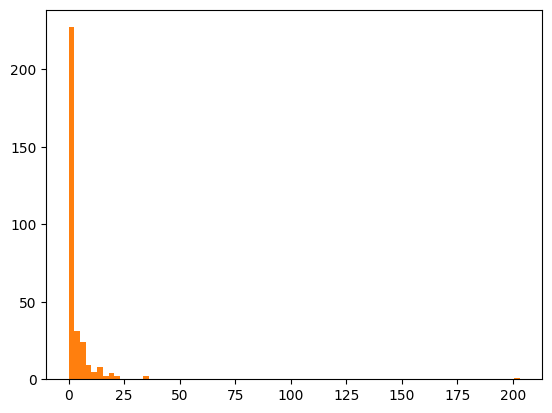

In [239]:
frequencies = plt.hist(sample, bins=k)[0]

frequencies_relative = []
for frequence in frequencies:
  frequencies_relative.append(frequence / n)

values = plt.hist(sample, bins=k)[1]

In [240]:
class BinWorker:
    def __init__(self, n: int):
        self.n = n


    @staticmethod
    def bin_mean(a: np.array) -> np.array:
        means = np.zeros(a.shape[0] - 1)

        for i in range(means.shape[0]):
            means[i] = (a[i] + a[i+1]) / 2
        return means

    def calc_mean(self, values: np.array, freqs: np.array) -> np.array:
        return np.sum(self.bin_mean(values) * freqs) / self.n

    def calc_sigma(self, values: np.array, freqs: np.array) -> np.array:
        return (np.sum(pow((self.bin_mean(values) - self.calc_mean(values, freqs)), 2) * freqs) / self.n) ** (1/2)

    @staticmethod
    def freqs_to_probs(distribution, bins: np.array) -> np.array:
        probs = []
        for i in range(len(bins) - 1):
            probs.append(distribution.cdf(bins[i + 1]) - distribution.cdf(bins[i]))

        return np.array(probs)

    def get_np(self, nums: np.array, bins: np.array, distribution):
      nums, bins = nums.copy(), bins.copy()
      n = sum(nums)
      probs = list(self.freqs_to_probs(distribution, bins))
      i = 0

      while i < len(nums):
          p = probs[i]
          if p * n < 5 and i < len(probs)-1:
              nums[i:i+2] = [nums[i] + nums[i+1]]
              bins[i:i+2] = [bins[i]]
              probs[i:i+2] = [probs[i] + probs[i+1]]
              i-=1
          elif p * n < 5 and i == len(probs)-1:
            nums[i-1:i+1] = [nums[i-1] + nums[i]]
            bins[i-1:i+1] = [bins[i-1]]
            probs[i-1:i+1] = [probs[i-1] + probs[i]]
            i-=1

          i+=1

      return nums, probs, bins

    def calc_chi_squared(self, n: np.array, p: np.array, params_quantity: int) -> Tuple[float, float]:
        z = sum(pow((n - self.n * p), 2) / (self.n * p))
        f = st.chi2.cdf(z, len(n) - params_quantity - 1)
        p_value = 2 * min(f, 1 - f)

        return z, p_value if not np.isnan(p_value) else 0.0

In [241]:
mean, std = df['C9'].mean(), df['C9'].std()
worker = BinWorker(len(df))
new_f, new_p, new_v = worker.get_np(frequencies.tolist(), values.tolist(), st.expon())

In [242]:
new_f, new_v

([227.0, 88.0], [0.0, 2.569620253164557, 203.0])

In [243]:
## Вероятность попадания в интервал при условии выполнения гипотезы H0
new_p

[0.9234353849257103, 0.07656461507428969]

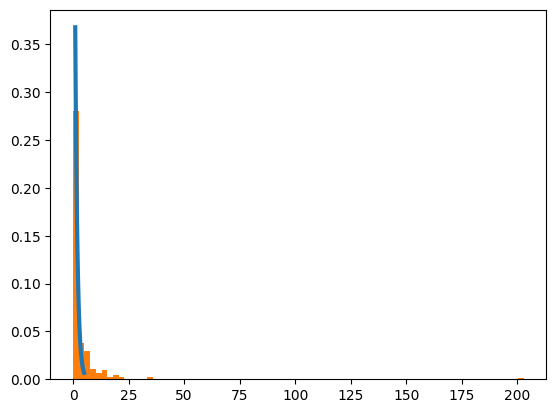

In [244]:
x = np.linspace(1, 5, 25)
expon = st.expon()
pdf = expon.pdf(x)

# плотность
plt.plot(x, pdf, lw=3)

plt.hist(sample, bins=k, density=True);

In [247]:
z, p = worker.calc_chi_squared(np.array(new_f), np.array(new_p), 1)
(f"Bins: Z: {z}; p: {p}")

'Bins: Z: 183.23727645574317; p: 0.0'

### 4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса (критерий Харке-Бера)

In [250]:
st.jarque_bera(sample)

SignificanceResult(statistic=632630.7365664298, pvalue=0.0)

## 5. Проверка однородности выборок

In [322]:
x, y = df['C11'], df['C12']

### 5.1 Критерий знаков

In [288]:
sign = st.wilcoxon(x, y)
'Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z=sign[0], p_value=sign[1])

'Sign test: z = 2424.000, p-value = 0.000'

In [266]:
k = math.ceil(1 + math.log2(len(df)))
h = (max(sample) - min(sample)) / k

### 5.2. Критерий хи-квадрат

In [272]:
freqs_x, values_x = np.histogram(df['C11'], bins=k)
freqs_y, values_y = np.histogram(df['C12'], bins=k)

In [274]:
freqs_x, freqs_y

(array([83, 94, 70, 36, 14,  7,  5,  4,  1,  1]),
 array([159, 124,  24,   5,   1,   1,   0,   0,   0,   1]))

In [283]:
st.chi2_contingency([[83, 94, 70, 78], [159, 124,24, 8]])

Chi2ContingencyResult(statistic=107.3535508089231, pvalue=4.072033090369331e-23, dof=3, expected_freq=array([[122.890625, 110.703125,  47.734375,  43.671875],
       [119.109375, 107.296875,  46.265625,  42.328125]]))

In [325]:
x = np.append(x, y.max())

[ 59. 111.  79.  34.  15.   8.   6.   7.   1.   3.]
[235.  76.   5.   1.   1.   0.   0.   1.   0.   3.]
[0.19 0.35 0.25 0.11 0.05 0.03 0.02 0.02 0.   0.01]
[0.75 0.24 0.02 0.   0.   0.   0.   0.   0.   0.01]
[  30.   991.2 1952.4 2913.6 3874.8 4836.  5797.2 6758.4 7719.6 8680.8
 9642. ]
[  30.   991.2 1952.4 2913.6 3874.8 4836.  5797.2 6758.4 7719.6 8680.8
 9642. ]


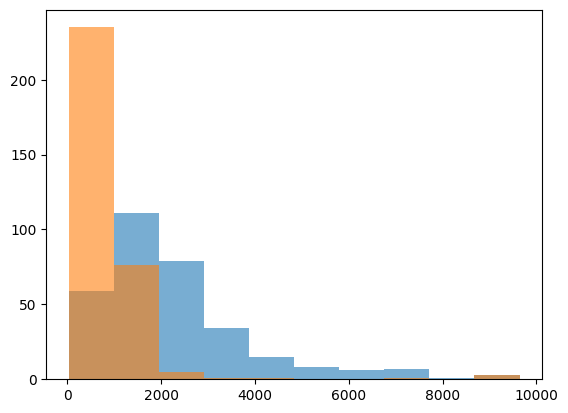

In [392]:
x, y = np.append(x, [y.max(), y.min()]), np.append(y, [x.min(), x.max()])

result = plt.hist(x,  bins=k, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_x = result[0]
values_x = result[1]
result = plt.hist(y,  bins=k, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_y = result[0]
values_y = result[1]


print(frequencies_x)
print(frequencies_y)
print(np.round((np.array(frequencies_x) / n).tolist(), 2))
print(np.round((np.array(frequencies_y) / n).tolist(), 2))
print(values_x)
print(values_y)

In [363]:
values_x

array([  30. ,  991.2, 1952.4, 2913.6, 3874.8, 4836. , 5797.2, 6758.4,
       7719.6, 8680.8, 9642. ])

<BarContainer object of 10 artists>

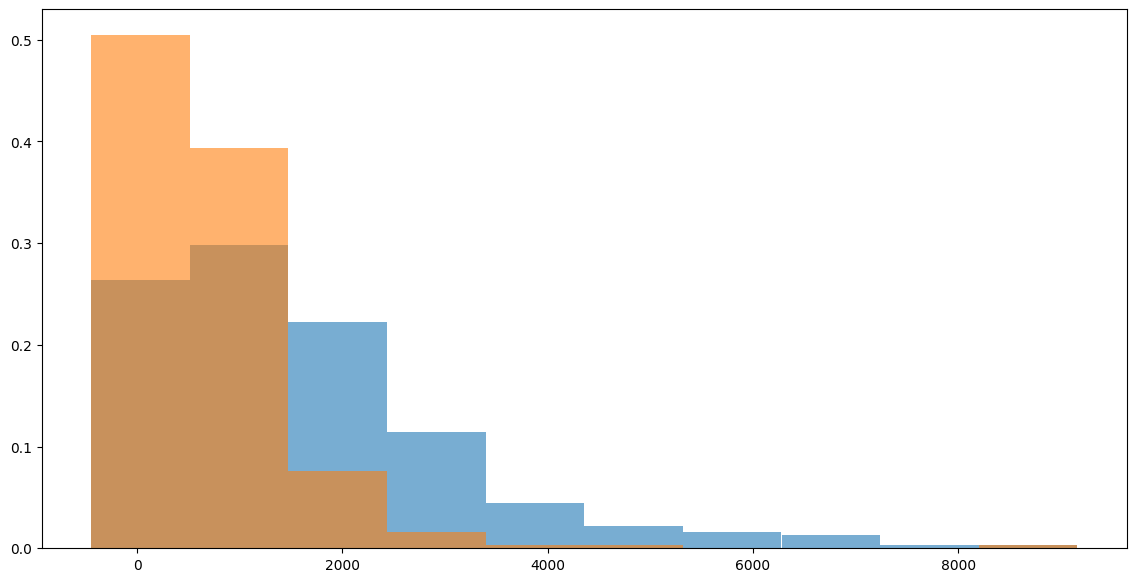

In [391]:
plt.figure(figsize=(14,7))
y1 = pd.cut(df['C11'], bins=k).value_counts(sort=False, normalize = True).values
plt.bar(values_x[:10], y1, width=960, alpha=0.6)

y2 = pd.cut(df['C12'], bins=k).value_counts(sort=False, normalize = True).values
plt.bar(values_y[:10], y2, width=960, alpha=0.6)

### 6. Таблицы сопряжённости

In [397]:
confusion_matrix = pd.crosstab(df['C2'], df['C5'])
confusion_matrix

C5,No,Not often,Often
C2,,,
Female,87,77,109
Male,24,5,13


In [398]:
np_matrix = confusion_matrix.to_numpy()

In [407]:
n = np_matrix.sum()
transposed = np_matrix.transpose()

m = []

for i in range(np_matrix.shape[0]):
  m_line = []

  for j in range(np_matrix.shape[1]):
    row_sum = np.sum(np_matrix[i])
    col_sum = np.sum(transposed[j])

    m_line.append((row_sum * col_sum) / n)

  m.append(m_line)

In [421]:
sum(m[1])

42.0

In [413]:
assert(sum(m[0]) + sum(m[1]) == n)

In [417]:
z = 0

for i in range(np_matrix.shape[0]):
  for j in range(np_matrix.shape[1]):
    z += ((np_matrix[i][j] - m[i][j]) ** 2) / m[i][j]

f_z_chi =  st.chi2((np_matrix.shape[0])*(np_matrix.shape[1])).cdf(z)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)
f_z_chi, p_value

(0.9137926464325167, 0.17241470713496665)

### 7. Дисперсионный анализ

In [424]:
values_mapper = {key: [] for key in df['C5'].unique()}

In [430]:
c5_values = df['C5'].values
c4_values = df['C4'].values

In [431]:
for i in range(len(df)):
  values_mapper[c5_values[i]].append(c4_values[i])

In [435]:
values_mapper = dict(zip(values_mapper.keys(), map(np.array, values_mapper.values())))

In [437]:
for key, value in values_mapper.items():
  print(f'{key}: volume: {value.shape[0]}; mean: {value.mean()}; var: {value.var()}')

Often: volume: 122; mean: 25.505599016393443; var: 33.52974779371378
Not often: volume: 82; mean: 26.625974999999997; var: 41.23889298755427
No: volume: 111; mean: 26.527564234234237; var: 34.21488781772891


In [439]:
distributions = list(values_mapper.values())
concated = np.concatenate(distributions)

In [440]:
K = 3
concated = np.concatenate(distributions)
total_mean = np.mean(concated)
total_variance = np.concatenate(distributions).var()

intragroup = np.sum([len(distribution) * distribution.var() for distribution in distributions]) / concated.shape[0]
intergroup = np.sum([len(distribution) * (distribution.mean() - total_mean) ** 2 for distribution in distributions]) / concated.shape[0]

intragroup_variation_coef = intragroup / (np.sum([len(distribution) * distribution.mean() for distribution in distributions]) / concated.shape[0])
interagroup_variation_coef = intergroup / (np.sum([len(distribution) * distribution.mean() for distribution in distributions]) / concated.shape[0])

In [446]:
assert(np.isclose(intergroup + intragroup, np.concatenate(distributions).var()))

In [442]:
intragroup_variation_coef, interagroup_variation_coef

(1.3677979998031162, 0.010321476089337214)

In [443]:
intragroup, intergroup

(35.77800318596965, 0.2699827053858623)

In [450]:
concated.var() / concated.mean()

1.3781194758924538

In [455]:
(intragroup * n)/(K - 1) # Несмещенная оценка: Факторный признак

5635.03550179022

In [456]:
(intergroup * n)/(n - K) # Несмещенная оценка: Остаточный признак

0.2725786929376494

In [454]:
(concated.var() * n) / (n - 1) # Несмещенная оценка: Общегрупповая

36.16278839419424

In [457]:
f'Эмперический коэффициент детерминации: {np.round(intergroup / (intergroup + intragroup), 2)}'

'Эмперический коэффициент детерминации: 0.01'

In [458]:
f'Эмперическое корелляционное отношение: {np.round(np.sqrt(intergroup / (intergroup + intragroup)), 2)}'

'Эмперическое корелляционное отношение: 0.09'

In [448]:
st.f_oneway(distributions[0], distributions[1], distributions[2])

F_onewayResult(statistic=1.1771842554005598, pvalue=0.30950998475430086)

## 8. Корреляционный анализ
### 8.1 Расчёт парных коэффициентов корреляции

In [459]:
x, y = df['C11'], df['C12']

In [470]:
alpha = 0.01
quantile = st.norm(loc = 0, scale = 1).ppf(1 - (alpha/2))

r = np.corrcoef(x, y)[0][1]

a = r + (r*(1-r**2)/(2*n)) - ((1-r**2)/n**(1/2)) * quantile
b = r + (r*(1-r**2)/(2*n)) + ((1-r**2)/n**(1/2)) * quantile

a, b

(-0.09177532548783005, 0.1976764948580372)

In [460]:
st.pearsonr(x, y), st.spearmanr(x, y), st.kendalltau(x, y)

(PearsonRResult(statistic=0.052866903502100424, pvalue=0.3496757486979532),
 SignificanceResult(statistic=0.1962857839707222, pvalue=0.0004582828568191489),
 SignificanceResult(statistic=0.1328626107882256, pvalue=0.0004387531397532802))

### 8.2. Расчёт множественных коэффициентов корреляции


In [609]:
x, y, z = df['C9'], df['C10'], df['C11']

In [612]:
distributions = [x, y, z]

kendall_pvalue = []
kendall = []

for i in range(len(distributions)):
  kendall_row = []
  kendall_row_p = []
  for j in range(len(distributions)):
    t = st.kendalltau(distributions[i], distributions[j])
    kendall_row.append(t[0])

    if i != j:
      kendall_row_p.append(t[1])
    else:
      kendall_row_p.append('null')


  kendall_pvalue.append(kendall_row_p)
  kendall.append(kendall_row)

kendall_pvalue


[['null', 0.10039805590011303, 0.266572886083427],
 [0.10039805590011303, 'null', 0.0005954463078042198],
 [0.266572886083427, 0.0005954463078042198, 'null']]

In [613]:
kendall

[[1.0, 0.06533464205687976, 0.044182285405969406],
 [0.06533464205687975, 1.0, 0.12972644997627059],
 [0.044182285405969406, 0.12972644997627059, 1.0]]

In [486]:
w = 0
k = 3

r1, r2, r3 = pd.Series(x).rank(), pd.Series(y).rank(), pd.Series(z).rank()
ranks = [r1, r2, r3]
ranks_mean = 0

for i in range(n):
  ranks_mean = 0

  for j in range(k):
    ranks_mean += (1/ k) * ranks[j][i]
  w += (ranks_mean - (n + 1) / 2) ** 2

w = (w * 12) / (n ** 3 - n)

w

0.405192782766757

In [490]:
z = k * (n - 1) * w
f_z = st.chi2(n-1).cdf(z)
p_value = 2 * min(f_z, 1 - f_z)

z, p_value

(381.6916013662851, 0.010633920174614397)

### 9. Регрессионный анализ
### 9.1 Простейшая линейная регрессионная модель

In [491]:
x, y = df['C11'], df['C13']

In [494]:
groups = df.groupby(['C11']).groups

for key in groups:
  values = [0] * len(groups[key])

  for i in range(len(groups[key])):
    j = groups[key][i]
    values[i] = y[j]

  groups[key] = values

In [502]:
k_xy = np.corrcoef(x, y)[0][1]

beta0 = y.mean() - k_xy * y.std() * x.mean() / x.std()
beta1 = k_xy * y.std() / x.std()

beta0, beta1

(128.89386881962395, 0.027909089527889522)

In [510]:
var_yx = 0

var_resy = 0
for i in range(n):
  var_resy += ((y[i] - (beta0 + beta1 * x[i])) ** 2) / n

var_y = y.var()

In [513]:
var_yx = var_y - var_resy
var_yx, var_resy, var_y

(1793.0179238660676, 31696.27612122543, 33489.2940450915)

In [515]:
k = 2
(n*var_yx)/(k-1), (n*var_resy)/(n-k), (n*var_y)/(n-1)

(564800.6460178113, 31898.808237016012, 33595.947847782874)

In [517]:
var_yx / var_y, (var_yx/var_y)**(1/2)
# коэффициент детерминации, корелляционное отношение

(0.05354003346418313, 0.23138719382062425)

In [549]:
var_res_lined = 0
for i in range(n):
  var_res_lined += ((y.mean() + k_xy * y.std() / x.std() * (x[i] - x.mean()) - y[i])**2)/(n-2)

x_squared_sum = (x ** 2).sum()

alphas = [0.01, 0.05, 0.1]

for alpha in alphas:
  beta0_addition = st.t(n-2).ppf(1-alpha/2) * np.sqrt(var_res_lined * x_squared_sum / (x.var() * n**2))
  beta1_addition = st.t(n-2).ppf(1-alpha/2) * np.sqrt(var_res_lined / (n * x.var()))
  print(f'Beta0 interval: ({beta0 - beta0_addition}, {beta0 + beta0_addition}')
  print(f'Beta1 interval: ({beta1 - beta1_addition}, {beta1 + beta1_addition}')

Beta0 interval: (82.27170766523736, 175.51602997401054
Beta1 interval: (0.010214499269604445, 0.0456036797861746
Beta0 interval: (93.49817530157056, 164.28956233767735
Beta1 interval: (0.014475300140996994, 0.04134287891478205
Beta0 interval: (99.2158878376834, 158.5718498015645
Beta1 interval: (0.016645353567009347, 0.0391728254887697


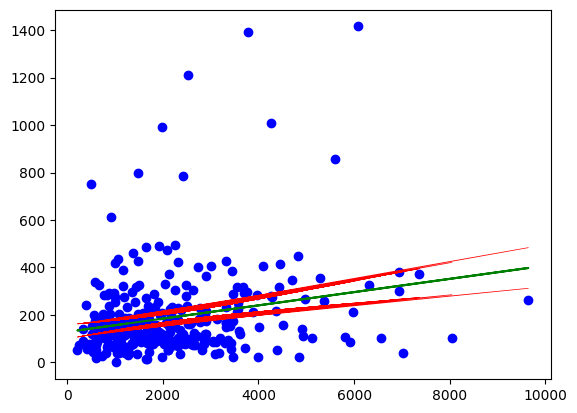

In [551]:
alpha = 0.1
flow = []
fhigh = []

for i in range(n):
    main = (y.mean() + k_xy * y.std() / x.std() * (x[i] - x.mean()))
    addition = st.t(n - 2).ppf(1 - alpha / 2) * (var_res_lined * (1/n + (x[i] - x.mean())**2 / (n*x.var())))**(1/2)
    flow.append(main - addition)
    fhigh.append(main + addition)

plt.scatter(x, y, color='blue')
lin_reg = beta1 * x + beta0

plt.plot(x, lin_reg, color='green')
plt.plot(x, fhigh, linestyle = '-',color='red', linewidth = 0.5)
plt.plot(x, flow, linestyle = '-', color='red', linewidth = 0.5)

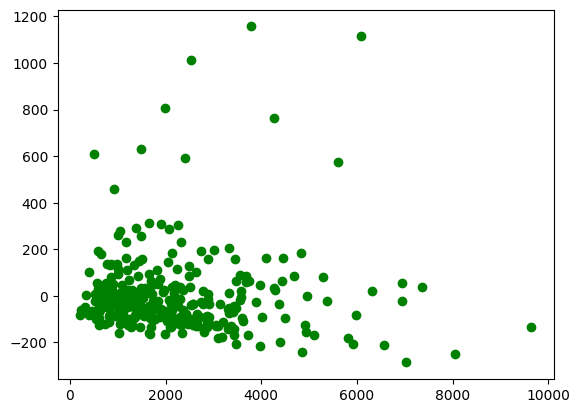

In [554]:
remains = y - (beta1 * x + beta0)
plt.scatter(x, remains, color='green')

In [557]:
rsquared = 1 - var_resy / var_y
z = rsquared / ((1 - rsquared) / (n - 2))

z, 1 - st.f(1, n - 2).cdf(z)

(17.706010889849026, 3.3715216787966185e-05)

## 9.2 Линейная регрессионная модель общего вида

In [558]:
x, y = df['C11'], df['C13']

In [572]:
x_squared = x ** 2
regression_matrix = regression_matrix = np.array([np.full(len(x), 1), x, x_squared]).transpose()
F = np.dot(regression_matrix.transpose(), regression_matrix)
result = np.dot(np.linalg.inv(F), regression_matrix.transpose())
result = np.dot(result, y)

In [573]:
beta0, beta1, beta2 = result[0], result[1], result[2]
beta0, beta1, beta2

(117.46391459020828, 0.037807235350453244, -1.4697514078436883e-06)

In [581]:
var_yx = 0
k = 3

var_res = 0
for i in range(n):
    var_res += 1/n * (y[i] - (beta0 + beta1 * x[i] + beta2 * (x[i])**2))**2

var_yx = y.var() - var_res

In [582]:
var_yx, var_res, y.var()

(1821.5806112789978, 31667.7134338125, 33489.2940450915)

In [578]:
var_res + y.std()

31850.714237212625

In [583]:
(n*var_yx)/(k-1), (n*var_resy)/(n-k), (n*var_y)/(n-1)

(286898.94627644215, 32001.048007006448, 33595.947847782874)

In [584]:
var_yx / var_y, (var_yx/var_y)**(1/2)
# коэффициент детерминации, корелляционное отношение

(0.05439292356615041, 0.23322290532053322)

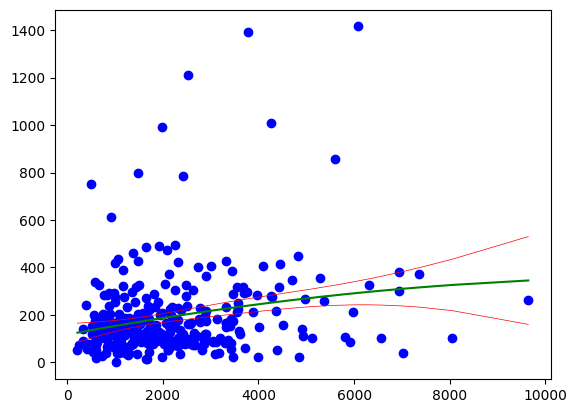

In [587]:
k = 3
alpha = 0.1
flow = []
fhigh = []

var_res_multi = 0
for i in range(n):
    var_res_multi += 1 / (n-k) * ((beta2 * x[i]**2 + beta1 * x[i] + beta0) - y[i])**2


for i in range(n):
    main = (beta2 * x[i]**2 + beta1 * x[i] + beta0)
    additional = st.t(n-k).ppf(1 - alpha / 2)*(var_res_multi * (np.dot(np.dot(np.array([1, x[i], x[i]**2]).transpose(),\
                                                    np.linalg.inv(F)), np.array([1, x[i], x[i]**2])))  )**(1/2)
    flow.append(main - additional)
    fhigh.append(main + additional)

df = pd.DataFrame({'X': x, 'Y': y, 'flow': flow, 'fhigh': fhigh})
df = df.sort_values('X')

x = df['X'].to_numpy()
y = df['Y'].to_numpy()
flow = df['flow'].to_numpy()
fhigh = df['fhigh'].to_numpy()

plt.scatter(x, y, color='blue')

lin_reg = []
for i in range(n):
  lin_reg.append(beta2 * x[i]**2 + beta1*x[i] + beta0)


plt.plot(x, lin_reg, color='green')
plt.plot(x, fhigh, linestyle = '-',color='red', linewidth = 0.5)
plt.plot(x, flow, linestyle = '-', color='red', linewidth = 0.5)

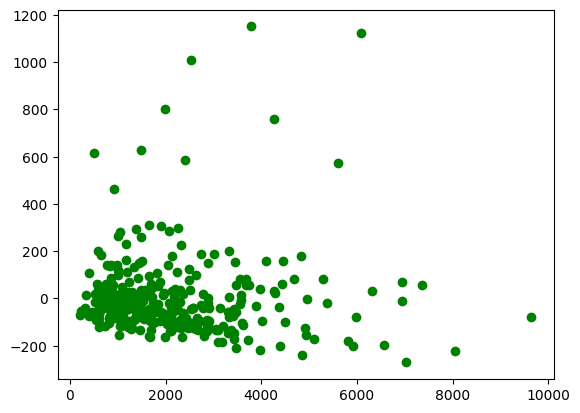

In [588]:
remainses = y - (beta2 * x**2 + beta1 * x + beta0)
plt.scatter(x, remainses, color='green')

In [589]:
rsquared = 1 - var_resy / var_y
z = rsquared / ((1 - rsquared) / (n - 2))

z, 1 - st.f(1, n - 2).cdf(z)

(17.706010889849026, 3.3715216787966185e-05)

### 9.3 Множественная линейная регрессионная модель

In [602]:
x1, x2, y = df['C11'], df['C4'], df['C13']

In [603]:
regression_matrix = np.array([np.full(len(x1), 1), x1, x2]).transpose()

F = np.dot(regression_matrix.transpose(), regression_matrix)
result = np.dot(np.linalg.inv(F), regression_matrix.transpose())
result = np.dot(result, y)
beta0, beta1, beta2 = result[0], result[1], result[2]
beta0, beta1, beta2

(310.7223673918358, 0.02772223663804229, -6.93571593255883)

In [604]:
var_yx = 0
k = 3

var_res = 0
for i in range(n):
    var_res += 1/n * (y[i] - (beta0 + beta1 * x1[i] + beta2 * x2[i]))**2

var_yx = y.var() - var_res

In [605]:
var_yx, var_res, y.var()

(3527.00023818286, 29962.293806908638, 33489.2940450915)

In [606]:
(n*var_yx)/(k-1), (n*var_resy)/(n-k), (n*var_y)/(n-1)

(555502.5375138004, 32001.048007006448, 33595.947847782874)

In [607]:
var_yx / var_y, (var_yx/var_y)**(1/2)
# коэффициент детерминации, корелляционное отношение

(0.10531724656345241, 0.32452618779299214)